# Настройка ноутбука

In [2]:
import numpy as np
import pandas as pd

import statistics as st
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Описание

- [Stepik: Основы статистики ч.1 - Меры центральной тенденции](https://stepik.org/lesson/8075?unit=1355)
- [Stepik: Основы статистики ч.1 - Меры изменчивости](https://stepik.org/lesson/8076?unit=1356)
- [Stepik: Основы статистики ч.1 - Квартили распределения и график box-plot](https://stepik.org/lesson/9294?unit=1827)

# Понятия

## Меры центральной тенденции (Measures of Central Tendency)

**Мода (Mode)** — наиболее часто встречающееся значение.

**Медиана (Median)** — значение, которое делит упорядоченные по возрастанию (убыванию) наблюдения пополам.

**Арифметическое среднее (Mean)** — сумма всех наблюденных значений, делённая на их количество.

Свойства средних:
<img src="data/img/mean_properties.png" width="500">

### Какую меру выбрать?

Если распределение симметрично, унимодально (имеет одну моду) и не имеет заметных выборосов (значений которые сильно больше или меньше основной массы измерений) - можно смело использовать любую из мер центральной тенденции. Они будут примерно одинаковыми.

Если у распределений наблюдается явно выраженная асиметрия (оно скошено либо в левую, либо в правую сторону), заметны выборосы или есть несколько мод - то среднее значение будет не верно охарактеризовывать выборку. В этих случаях лучше использвовать моду или медиану. Или сразу несколько мер.

### Парадокс Симпсона

- [Хабр: Данные всех стран, не объединяйтесь](https://habr.com/ru/company/wrike/blog/503998/)

### Практика работы

<img src="data/img/measures_of_central_tendency.png" width="500">

Соотнесите линию с мерой центральной тенденции:

<font color='red'>Мода</font> - самое часто встречающееся значение в выборке. Самый большой столбик.

<font color='green'>Медиана</font> - размах значений разложен на целое значение условных единиц (1 у.е. - ширина столбика). По определению медиана делит размах пополам. Следовательно она может располагаться либо четко посередине столбика, либо (как в нашем случае) четко между столбиками

<font color='blue'>Среднее значение</font> -  может быть дробным

## Меры изменчивости (Measures of Variability)

### Размах и межквартильный размах (Range & Interquartile Range)

### Дисперсия и стандартное отклонение (Variance & Standard Deviation)

**Дисперсия (variance)** - средний квадрат отклонений индивидуальных значений признака от их средней величины.

Дисперсия величина не относительная, а абсолютная, и если у вас в данных величины одного порядка (с одним количеством нулей) - то нужно думать, а если одна выборка на порядок или два в значения больше других - то малейшее вариативность в ней - даст значимо большее отклонение

In [5]:
vals = [1, 1, 2, 3, 5, 5, 7, 8, 9, 9]

pd.Series({
    'formula': (sum((vals - np.mean(vals))**2)/(len(vals)-1))**0.5,
    'numpy': np.std(vals, ddof=1),
    'statistics': st.stdev(vals),
    'scipy_stats': stats.tstd(vals),
    'pandas': pd.Series(vals).std()
})

formula        3.162278
numpy          3.162278
statistics     3.162278
scipy_stats    3.162278
pandas         3.162278
dtype: float64

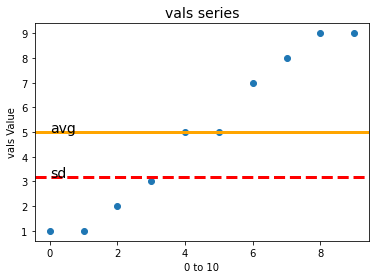

In [6]:
mn = st.mean(vals)
sd = st.stdev(vals)

x = [*range(len(vals))]
plt.text(0, sd, "sd", fontsize=14)
plt.axhline(y=sd, linewidth=3, c='red', linestyle='--')
plt.text(0, mn, "avg", fontsize=14)
plt.axhline(y=mn, linewidth=3, c='orange')
plt.scatter(x, vals)
plt.title('vals series', fontsize=14)
plt.xlabel(f'0 to {len(vals)}', fontsize=10)
plt.ylabel('vals Value', fontsize=10)
plt.show()

### Квантиль и квартиль

- [Quartiles & Quantiles | Definition, Calculation & Interpretation](https://www.scribbr.com/statistics/quartiles-quantiles/#:~:text=What%20are%20quartiles%3F,falls%20below%20the%20second%20quartile.)
- [Medium: Create and customize boxplots with Python’s Matplotlib to get lots of insights from your data](https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643)

<img src="data/img/quartile_1.png" width="400">
<img src="data/img/quartile_2.png" width="400">

Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Представьте что box plot это вид сверху на гистограмму

In [87]:
def get_report(data):
    '''
    Функция рассчитывает меры центральной тенденции и меры изменчиваости для предоставленного ряда (рядов)
    '''
    
    if isinstance(data, pd.Series):
        data = data.to_frame()
    
    report = pd.DataFrame({
        ('', 'count'): data.count(), 
        
        ('Measures of Central Tendency', 'mode'): data.mode().T[0],
        ('Measures of Central Tendency', 'median'): data.median(),
        ('Measures of Central Tendency', 'mean'): data.mean(),
        
        ('Quantile', 'min'): data.min(),
        ('Quantile', '25%'): data.quantile(q=0.25, axis=0, interpolation='linear'),
        ('Quantile', '50%'): data.quantile(q=0.5, axis=0, interpolation='linear'),
        ('Quantile', '75%'): data.quantile(q=0.75, axis=0, interpolation='linear'),
        ('Quantile', 'max'): data.max(),
        
        ('Measures of Variability', 'range'): data.max() - data.min(),
        ('Measures of Variability', 'variance'): data.var(),
        ('Measures of Variability', 'std'): data.std(),  
    })
    report = round(report, 2)
    
    return report

Measures of Central Tendency              Quantile                     \
  count                         mode median  mean      min  25%  50%  75% max   
0    61                            3    5.0  5.18        1  3.0  5.0  7.0   9   

  Measures of Variability                 
                    range variance   std  
0                       8     5.08  2.25

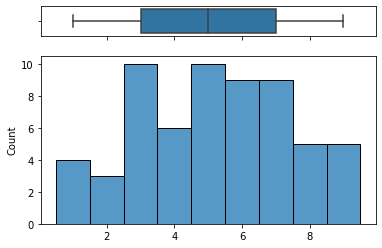

In [143]:
import random

vals = pd.Series([
    *[1] * random.randint(1,10),
    *[2] * random.randint(1,10),
    *[3] * random.randint(1,10),
    *[4] * random.randint(1,10),
    *[5] * random.randint(1,10),
    *[6] * random.randint(1,10),
    *[7] * random.randint(1,10),
    *[8] * random.randint(1,10),
    *[9] * random.randint(1,10),
])

display(get_report(vals))

# создаем фигуру из двух объектов-осей (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# добавляем график к каждой оси
sns.boxplot(x=vals, ax=ax_box)
sns.histplot(
    x=vals, 
    ax=ax_hist, 
    discrete=True
)

 
# удаляем ось x для boxplot
ax_box.set(xlabel='')
plt.show() 